In [51]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets as ds
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

data = ds.heart.load_pandas().data
len(data)

69

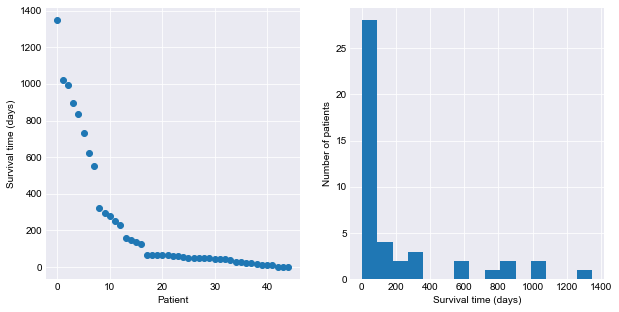

In [53]:
data = data[data.censors==1]
survival = data.survival

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(sorted(survival)[::-1], 'o')
plt.xlabel('Patient')
plt.ylabel('Survival time (days)')

plt.subplot(122)
plt.hist(survival, bins=15)
plt.xlabel('Survival time (days)')
plt.ylabel('Number of patients')

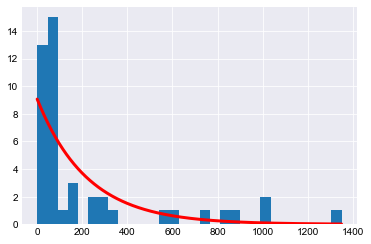

In [78]:
smean = survival.mean()
rate = 1./smean
smax = survival.max()
days = np.linspace(0., smax, 1000)
dt = smax / 999.

dist_exp = st.expon.pdf(days, scale=1./rate)

nbins = 30
plt.hist(survival, nbins)
plt.plot(days, dist_exp*len(survival)*smax/nbins, '-r', lw=3)

In [82]:
dist = st.expon
args = dist.fit(survival)

st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.36199685486406347, pvalue=8.6470960143358866e-06)

In [95]:
vx = np.array([58, 11, 66, 54, 20, 78, 51, 81, 29, 31, 40, 49, 14, 52])
xNorm = st.norm.rvs(size=14)

st.kstest(vx, "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [97]:
dist = st.fatiguelife
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.18773446101946889, pvalue=0.073211497000863268)

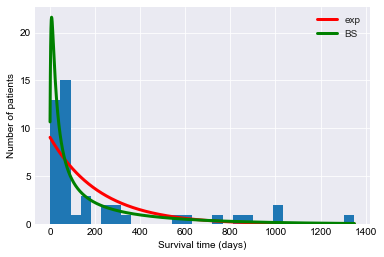

In [99]:
dist_fl = dist.pdf(days, *args)
nbins = 30
plt.hist(survival, nbins)

plt.plot(days, dist_exp*len(survival)*smax/nbins, '-r', lw=3, label='exp')
plt.plot(days, dist_fl*len(survival)*smax/nbins, '-g', lw=3, label='BS')
plt.xlabel("Survival time (days)")
plt.ylabel("Number of patients")
plt.legend()